In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

raw_data = pd.read_csv('data/onehr.data')

In [3]:
from kedro.pipeline import node

def load_data(data):
    return data

nodes = []

nodes.append(
    node(func=load_data,
         inputs="ozone",
         outputs="raw_data")
)

In [4]:
import numpy as np
import pandas as pd

def preprocessing(data):
    data = data.replace('?', np.nan)

    data['Date'] = pd.to_datetime(data['Date'])

    for column in data.columns[1:-2]:
        data[column] = data[column].astype(float)
    
    data = data.drop_duplicates()
    data.reset_index(drop=True, inplace=True)

    data.fillna(data.mean(), inplace=True)
    
    return data

nodes.append(
    node(func=preprocessing,
         inputs="raw_data",
         outputs="ozone_processed")
)

In [5]:
from kedro.io import DataCatalog
from kedro.extras.datasets.pandas import CSVDataSet

data_catalog = DataCatalog(
    {
        "ozone": CSVDataSet(filepath="data/onehr.data",
                            load_args=dict(sep=","))
    },
    {
        "ozone_processed": CSVDataSet(filepath="data/onehr.processed.data",
                                      save_args=dict(sep=',', index=False))
    }
)

In [6]:
from kedro.pipeline import Pipeline

pipeline = Pipeline(nodes)

In [7]:
from kedro.runner import SequentialRunner

runner = SequentialRunner()
runner.run(pipeline, data_catalog)

{}

In [8]:
import pandas as pd

data_file = "data/onehr.processed.data"
data = pd.read_csv(data_file, parse_dates=["Date"])
# data.head()

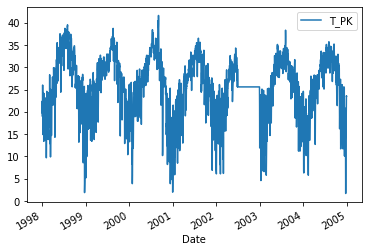

In [9]:
data.plot(x='Date', y='T_PK',);



In [10]:
import panel as pn
pn.extension()
import hvplot.pandas

columns = list(data.columns)
columns.remove('Date')
columns.remove('class')

y = pn.widgets.Select(name='y', options=columns, size=10)

plot = data.hvplot(x='Date', y=y)

pn.Row(y, plot)

/usr/local/lib/python3.8/dist-packages/panel/pane/base.py:38: DeprecationWarning: panel.Pane(...) is deprecated, use panel.panel(...) instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bokeh/core/property/bases.py:259: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return new == old


Row
    [0] Select(name='y', options=['WSR0', 'WSR1', ...], size=10, value='WSR0')
    [1] ParamFunction(function)